Zadanie 1

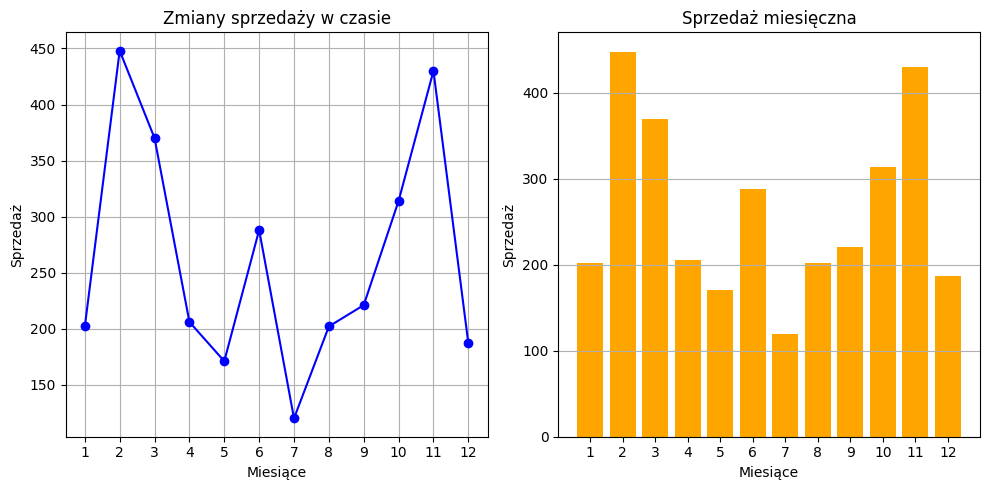

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def wykres_sprzedazy():

    np.random.seed(42)
    miesiace = ['1', '2', '3', '4', '5', '6',
                '7', '8', '9', '10', '11', '12']
    sprzedaz = np.random.randint(100, 500, size=12)


    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)

    plt.plot(miesiace, sprzedaz, marker='o', linestyle='-', color='b')
    plt.title('Zmiany sprzedaży w czasie')
    plt.xlabel('Miesiące')
    plt.ylabel('Sprzedaż')
    plt.grid(True)


    plt.subplot(1, 2, 2)

    plt.bar(miesiace, sprzedaz, color='orange')
    plt.title('Sprzedaż miesięczna')
    plt.xlabel('Miesiące')
    plt.ylabel('Sprzedaż')
    plt.grid(True, axis='y')


    plt.tight_layout()
    plt.show()


wykres_sprzedazy()


Zadanie 2

Dane sprzedażowe:
      Month Region  Sales  Temperature   Humidity
0   January  North    152    11.004330  62.417198
1  February  North    485    28.697318  84.841061
2     March  North    398    20.613839  65.575392
3     April  North    320    10.272466  84.047177
4       May  North    156    -9.403077  79.502700


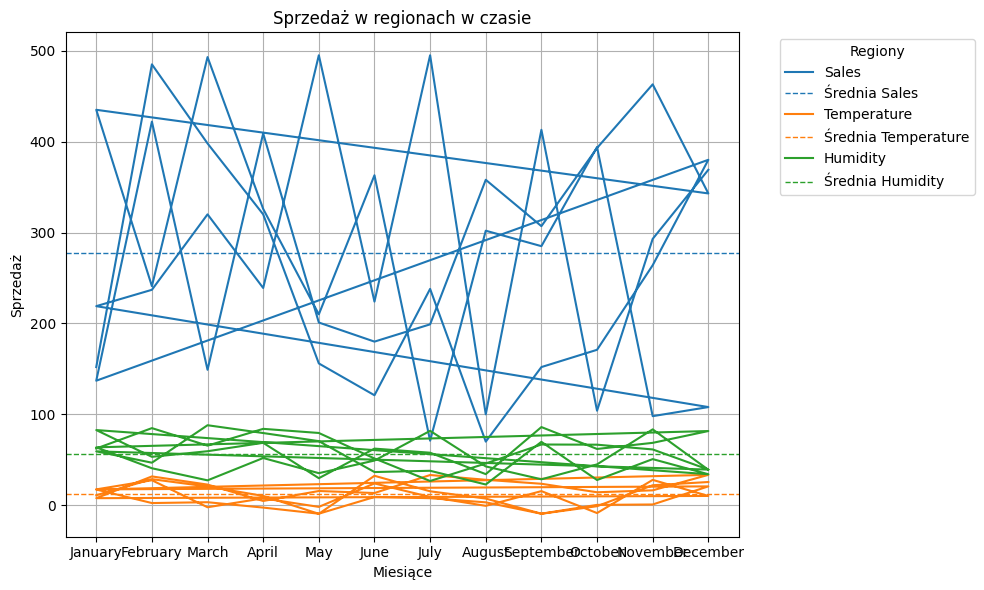

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def wykres_sprzedazy_regiony(plik_csv):

    dane = pd.read_csv(plik_csv)


    print("Dane sprzedażowe:")
    print(dane.head())


    dane_numeryczne = dane.select_dtypes(include=[np.number])


    if dane_numeryczne.empty:
        print("Brak danych numerycznych do analizy!")
        return


    miesiace = dane['Month']
    regiony = dane_numeryczne.columns


    plt.figure(figsize=(10, 6))

    for region in regiony:

        plt.plot(miesiace, dane[region], label=region)


        srednia = np.mean(dane[region])


        plt.axhline(y=srednia, linestyle='--', color=plt.gca().lines[-1].get_color(), linewidth=1,
                    label=f"Średnia {region}")


    plt.legend(title="Regiony", bbox_to_anchor=(1.05, 1), loc='upper left')


    plt.title('Sprzedaż w regionach w czasie')
    plt.xlabel('Miesiące')
    plt.ylabel('Sprzedaż')


    plt.grid(True)


    plt.tight_layout()


    plt.show()


plik_csv = '/content/sales_data.csv'
wykres_sprzedazy_regiony(plik_csv)


Zadanie 3

Dostępne kolumny w pliku CSV:
Index(['Month', 'Region', 'Sales', 'Temperature', 'Humidity'], dtype='object')


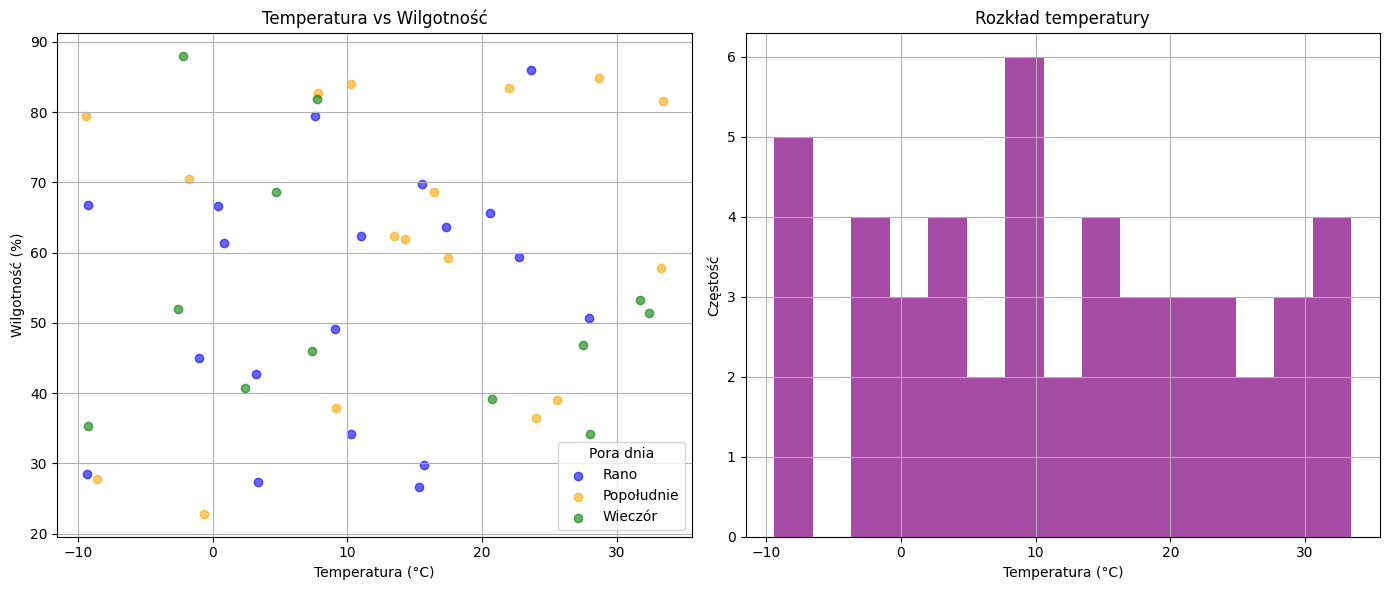

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def wykres_scatter_histogram(plik_csv):

    dane = pd.read_csv(plik_csv)


    print("Dostępne kolumny w pliku CSV:")
    print(dane.columns)


    if not {'Temperature', 'Humidity'}.issubset(dane.columns):
        print("Plik CSV musi zawierać kolumny: 'Temperature', 'Humidity'.")
        return


    np.random.seed(0)
    czas_values = ['Rano', 'Popołudnie', 'Wieczór']
    dane['Czas'] = np.random.choice(czas_values, size=len(dane))


    temperatura = dane['Temperature']
    wilgotnosc = dane['Humidity']
    czas = dane['Czas']


    kolory = {'Rano': 'blue', 'Popołudnie': 'orange', 'Wieczór': 'green'}


    plt.figure(figsize=(14, 6))


    plt.subplot(1, 2, 1)
    for pora, kolor in kolory.items():
        mask = (czas == pora)
        plt.scatter(temperatura[mask], wilgotnosc[mask], color=kolor, label=pora, alpha=0.6)


    plt.title('Temperatura vs Wilgotność')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Wilgotność (%)')
    plt.legend(title="Pora dnia")
    plt.grid(True)


    plt.subplot(1, 2, 2)
    plt.hist(temperatura, bins=15, color='purple', alpha=0.7)


    plt.title('Rozkład temperatury')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Częstość')
    plt.grid(True)


    plt.tight_layout()


    plt.show()


plik_csv = '/content/sales_data.csv'
wykres_scatter_histogram(plik_csv)


Zadanie 4

Dostępne kolumny w pliku CSV:
Index(['Month', 'Region', 'Sales', 'Temperature', 'Humidity'], dtype='object')


<ipython-input-28-40027f432ad7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Sales', data=dane, palette='Set3')


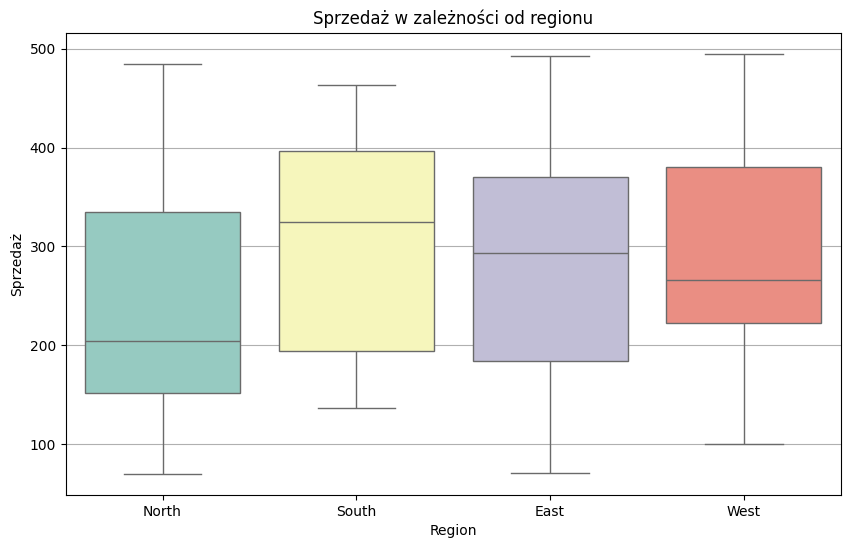

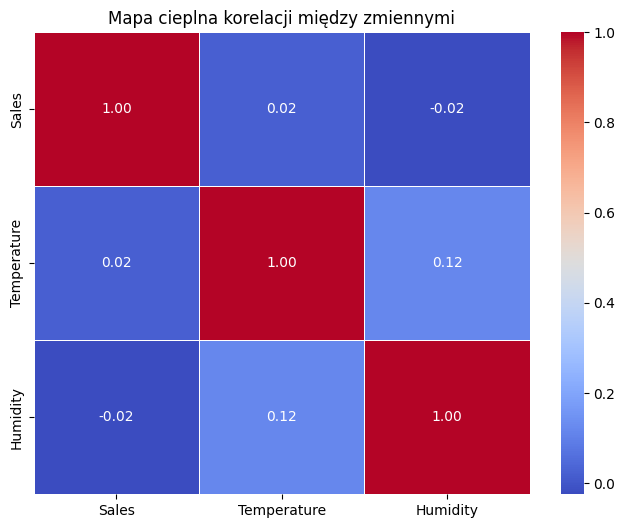

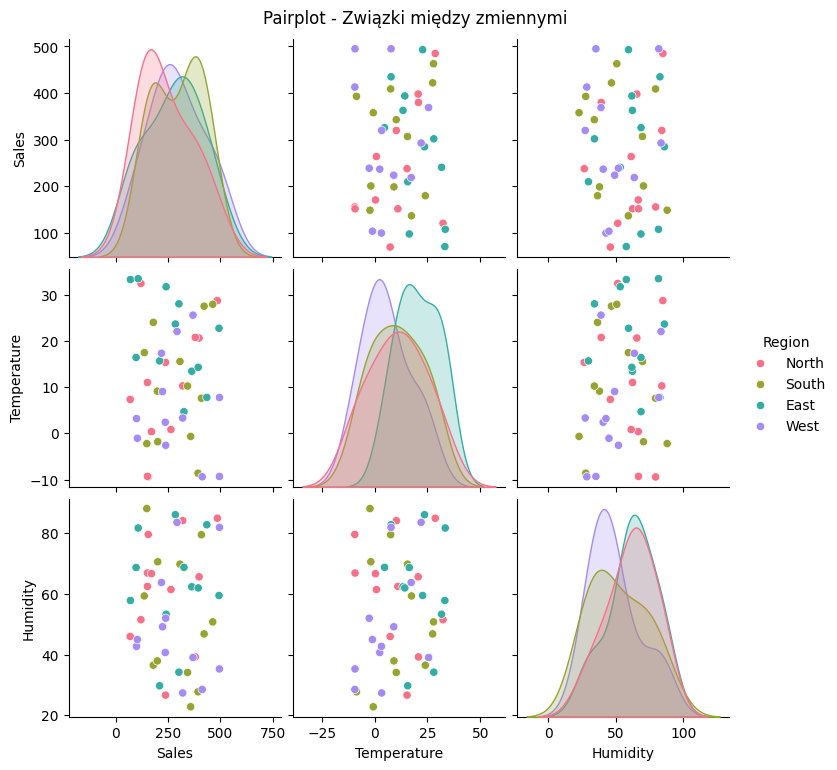

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def zaawansowane_wizualizacje(plik_csv):

    dane = pd.read_csv(plik_csv)


    print("Dostępne kolumny w pliku CSV:")
    print(dane.columns)


    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Region', y='Sales', data=dane, palette='Set3')
    plt.title('Sprzedaż w zależności od regionu')
    plt.xlabel('Region')
    plt.ylabel('Sprzedaż')
    plt.grid(True, axis='y')
    plt.show()

    dane_numeryczne = dane[['Sales', 'Temperature', 'Humidity']]
    korelacje = dane_numeryczne.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(korelacje, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Mapa cieplna korelacji między zmiennymi')
    plt.show()


    sns.pairplot(dane, hue='Region', palette='husl')
    plt.suptitle('Pairplot - Związki między zmiennymi', y=1.02)
    plt.show()


plik_csv = '/content/sales_data.csv'
zaawansowane_wizualizacje(plik_csv)
